# Methodology

## Algorithm: DDGP

To solve this task, we used Deep Deterministic Policy Gradient (DDPG). This algorithm is known as Actor-Critic. It uses two neural nets, one to get the best action, then the second takes that action to output the value of that action. This algorithm is used with continuous space actions as it's hard to apply DQN for those. 

## Model

For the model I used the Actor-Critic method to solve this task. 

**Model Architecture**

Number of agents = 2

*Actor*
2. Linear layer | shape(in = 24, out = 400)
4. Leaky ReLU activation layer
5. Linear layer | shape(in = 400, out = 300)
7. Leaky ReLU activation layer
8. Linear layer | shape(in = 300, out = 2)
9. Tanh Activation

*Critic*
2. Linear layer | shape(in = 24, out = 400)
3. Leaky ReLU activation layer
4. Concat action to fcs1 | (in = 400, out = 402)
5. Linear layer | shape(in = 402, out = 300)
6. Leaky ReLU activation layer
7. Linear layer | shape(in = 300, out = 2)

To adapt the original DDPG implementation to this multi-agent process, few things needed to be added to separate them. One was the noise, since the aim of adding this noise instead of a random one is that it is more fitted for each network. 

**Hyper Parameters**
```
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
```

# Results

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
output_path = Path('.')
statuses = pd.read_csv((output_path / 'statuses.csv'), names=['episode', 'average-100', 'score'])
statuses.head()

,episode,average-100,score
0,1,-0.005000,-0.005
1,1,-0.005000,-0.005
2,1,-0.005000,-0.005
3,2,0.020000,0.045
4,3,0.011667,-0.005


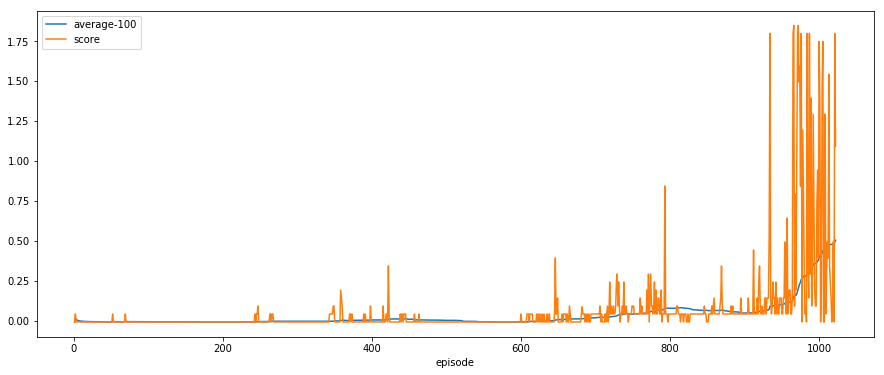

In [3]:
statuses.plot(x='episode', figsize=(15,6))
plt.savefig('rolling_mean_vs_score.png')
plt.show()

Environment was solved in **1022** episodes!

# Analysis

The performance of our model on this agent was peculiar. The plot of the score shows how the model seems to be performing really bad then it suddenly learns a better fit for the weights that solves the task. The score is fluctuating even after it was solved. 

# Future Plans

1. Add gradient clipping to stabilize the score
2. Try learning from the pixels
3. Test the algorithm on the soccer environment